## Load Diabetes Data 

In [526]:
# first neural network with keras tutorial
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sk
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [501]:
# load the dataset
dataset = pd.read_csv('C:/Users/Bangga Rakana Adian/Desktop/Kuliah/python/pima-indians-diabetes.data.csv')
dataset

,A,B,C,D,E,F,G,H,I
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Data Visualization

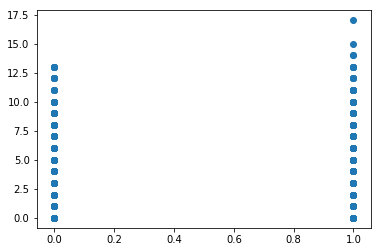

In [525]:
plt.scatter(y = dataset['A'], x = dataset['I'])

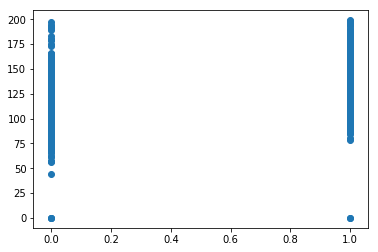

In [503]:
plt.scatter(y = dataset['B'], x = dataset['I'])

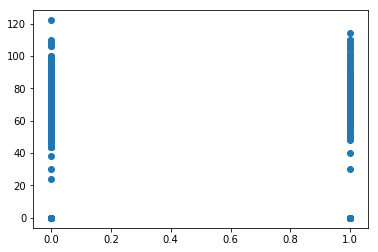

In [504]:
plt.scatter(y = dataset['C'], x = dataset['I'])

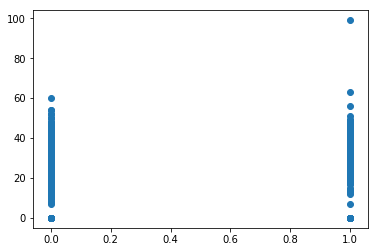

In [505]:
plt.scatter(y = dataset['D'], x = dataset['I'])

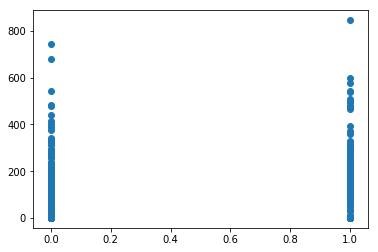

In [506]:
plt.scatter(y = dataset['E'], x = dataset['I'])

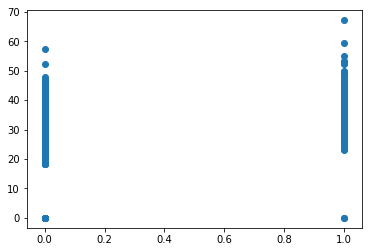

In [507]:
plt.scatter(y = dataset['F'], x = dataset['I'])

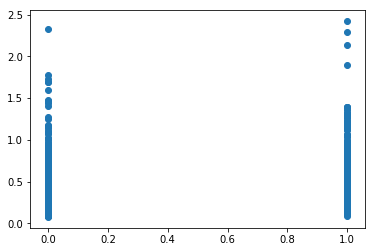

In [508]:
plt.scatter(y = dataset['G'], x = dataset['I'])

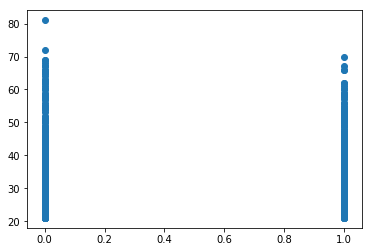

In [509]:
plt.scatter(y = dataset['H'], x = dataset['I'])

# Train & Test using Logistic Regression

In [511]:
# split into input (X) and output (y) variables
dataraw = dataset.values
x = dataraw[:,0:5]
y = dataraw[:,8]

In [514]:
x_train = x[:int(.6 * len(y))]
y_train = y[:int(.6 * len(y))]
x_test =  x[int(.6 * len(y)):]
y_test =  y[int(.6 * len(y)):]

In [516]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)
print('Logistic Regression accuracy (Test): %f' % clf.score(x_test,y_test))

Logistic Regression accuracy (Test): 0.814935


C:\Users\Bangga Rakana Adian\Anaconda3\envs\mentoring_rm_3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Create, Compile, and Evaluate Neural Network

In [517]:
opt = Adam(learning_rate=0.005)

In [518]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

In [519]:
def create_baseline():
    model = Sequential()
    model.add(Dense(8, input_dim=5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [520]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=3000, batch_size=100, verbose=2)
kfold = StratifiedKFold(n_splits=2, shuffle=True)
results = cross_val_score(estimator, x, encoded_Y, cv=kfold)
print("Baseline: {}".format(results.mean()*100))

Train on 384 samples
Epoch 1/3000
384/384 - 0s - loss: 11.6706 - accuracy: 0.4193
Epoch 2/3000
384/384 - 0s - loss: 5.5354 - accuracy: 0.5339
Epoch 3/3000
384/384 - 0s - loss: 3.6813 - accuracy: 0.6432
Epoch 4/3000
384/384 - 0s - loss: 4.1569 - accuracy: 0.6406
Epoch 5/3000
384/384 - 0s - loss: 3.4322 - accuracy: 0.6536
Epoch 6/3000
384/384 - 0s - loss: 2.1998 - accuracy: 0.6615
Epoch 7/3000
384/384 - 0s - loss: 2.2694 - accuracy: 0.5964
Epoch 8/3000
384/384 - 0s - loss: 2.2877 - accuracy: 0.5729
Epoch 9/3000
384/384 - 0s - loss: 2.0081 - accuracy: 0.6406
Epoch 10/3000
384/384 - 0s - loss: 1.9645 - accuracy: 0.6536
Epoch 11/3000
384/384 - 0s - loss: 1.9106 - accuracy: 0.6536
Epoch 12/3000
384/384 - 0s - loss: 1.7628 - accuracy: 0.6380
Epoch 13/3000
384/384 - 0s - loss: 1.6975 - accuracy: 0.6458
Epoch 14/3000
384/384 - 0s - loss: 1.6130 - accuracy: 0.6484
Epoch 15/3000
384/384 - 0s - loss: 1.5310 - accuracy: 0.6536
Epoch 16/3000
384/384 - 0s - loss: 1.4750 - accuracy: 0.6615
Epoch 17/30

Epoch 135/3000
384/384 - 0s - loss: 0.5908 - accuracy: 0.7031
Epoch 136/3000
384/384 - 0s - loss: 0.5910 - accuracy: 0.7005
Epoch 137/3000
384/384 - 0s - loss: 0.5916 - accuracy: 0.7031
Epoch 138/3000
384/384 - 0s - loss: 0.5873 - accuracy: 0.6979
Epoch 139/3000
384/384 - 0s - loss: 0.6016 - accuracy: 0.7109
Epoch 140/3000
384/384 - 0s - loss: 0.6012 - accuracy: 0.6797
Epoch 141/3000
384/384 - 0s - loss: 0.5961 - accuracy: 0.6797
Epoch 142/3000
384/384 - 0s - loss: 0.5870 - accuracy: 0.7109
Epoch 143/3000
384/384 - 0s - loss: 0.5904 - accuracy: 0.7005
Epoch 144/3000
384/384 - 0s - loss: 0.5862 - accuracy: 0.6797
Epoch 145/3000
384/384 - 0s - loss: 0.5863 - accuracy: 0.7161
Epoch 146/3000
384/384 - 0s - loss: 0.5879 - accuracy: 0.6953
Epoch 147/3000
384/384 - 0s - loss: 0.5875 - accuracy: 0.6953
Epoch 148/3000
384/384 - 0s - loss: 0.6113 - accuracy: 0.6849
Epoch 149/3000
384/384 - 0s - loss: 0.6274 - accuracy: 0.6797
Epoch 150/3000
384/384 - 0s - loss: 0.6009 - accuracy: 0.6771
Epoch 15

Epoch 268/3000
384/384 - 0s - loss: 0.5926 - accuracy: 0.6849
Epoch 269/3000
384/384 - 0s - loss: 0.5879 - accuracy: 0.6771
Epoch 270/3000
384/384 - 0s - loss: 0.5675 - accuracy: 0.7214
Epoch 271/3000
384/384 - 0s - loss: 0.5524 - accuracy: 0.7240
Epoch 272/3000
384/384 - 0s - loss: 0.5715 - accuracy: 0.7109
Epoch 273/3000
384/384 - 0s - loss: 0.5943 - accuracy: 0.6875
Epoch 274/3000
384/384 - 0s - loss: 0.5887 - accuracy: 0.7005
Epoch 275/3000
384/384 - 0s - loss: 0.5998 - accuracy: 0.6901
Epoch 276/3000
384/384 - 0s - loss: 0.5896 - accuracy: 0.6927
Epoch 277/3000
384/384 - 0s - loss: 0.6032 - accuracy: 0.6719
Epoch 278/3000
384/384 - 0s - loss: 0.5651 - accuracy: 0.7292
Epoch 279/3000
384/384 - 0s - loss: 0.5700 - accuracy: 0.7109
Epoch 280/3000
384/384 - 0s - loss: 0.5573 - accuracy: 0.7135
Epoch 281/3000
384/384 - 0s - loss: 0.5453 - accuracy: 0.7266
Epoch 282/3000
384/384 - 0s - loss: 0.5410 - accuracy: 0.7188
Epoch 283/3000
384/384 - 0s - loss: 0.5479 - accuracy: 0.7266
Epoch 28

Epoch 401/3000
384/384 - 0s - loss: 0.5752 - accuracy: 0.7109
Epoch 402/3000
384/384 - 0s - loss: 0.5543 - accuracy: 0.6953
Epoch 403/3000
384/384 - 0s - loss: 0.5472 - accuracy: 0.7318
Epoch 404/3000
384/384 - 0s - loss: 0.5624 - accuracy: 0.7031
Epoch 405/3000
384/384 - 0s - loss: 0.5453 - accuracy: 0.7214
Epoch 406/3000
384/384 - 0s - loss: 0.5640 - accuracy: 0.7083
Epoch 407/3000
384/384 - 0s - loss: 0.5803 - accuracy: 0.7031
Epoch 408/3000
384/384 - 0s - loss: 0.5555 - accuracy: 0.7214
Epoch 409/3000
384/384 - 0s - loss: 0.5566 - accuracy: 0.7161
Epoch 410/3000
384/384 - 0s - loss: 0.5317 - accuracy: 0.7474
Epoch 411/3000
384/384 - 0s - loss: 0.5269 - accuracy: 0.7396
Epoch 412/3000
384/384 - 0s - loss: 0.5381 - accuracy: 0.7188
Epoch 413/3000
384/384 - 0s - loss: 0.5331 - accuracy: 0.7318
Epoch 414/3000
384/384 - 0s - loss: 0.5411 - accuracy: 0.7344
Epoch 415/3000
384/384 - 0s - loss: 0.5427 - accuracy: 0.7240
Epoch 416/3000
384/384 - 0s - loss: 0.5672 - accuracy: 0.6849
Epoch 41

Epoch 534/3000
384/384 - 0s - loss: 0.5266 - accuracy: 0.7448
Epoch 535/3000
384/384 - 0s - loss: 0.5121 - accuracy: 0.7552
Epoch 536/3000
384/384 - 0s - loss: 0.5144 - accuracy: 0.7552
Epoch 537/3000
384/384 - 0s - loss: 0.5130 - accuracy: 0.7396
Epoch 538/3000
384/384 - 0s - loss: 0.5169 - accuracy: 0.7604
Epoch 539/3000
384/384 - 0s - loss: 0.5223 - accuracy: 0.7422
Epoch 540/3000
384/384 - 0s - loss: 0.5186 - accuracy: 0.7630
Epoch 541/3000
384/384 - 0s - loss: 0.5228 - accuracy: 0.7214
Epoch 542/3000
384/384 - 0s - loss: 0.5198 - accuracy: 0.7422
Epoch 543/3000
384/384 - 0s - loss: 0.5231 - accuracy: 0.7500
Epoch 544/3000
384/384 - 0s - loss: 0.5269 - accuracy: 0.7292
Epoch 545/3000
384/384 - 0s - loss: 0.5247 - accuracy: 0.7630
Epoch 546/3000
384/384 - 0s - loss: 0.5213 - accuracy: 0.7318
Epoch 547/3000
384/384 - 0s - loss: 0.5139 - accuracy: 0.7396
Epoch 548/3000
384/384 - 0s - loss: 0.5130 - accuracy: 0.7448
Epoch 549/3000
384/384 - 0s - loss: 0.5183 - accuracy: 0.7526
Epoch 55

Epoch 667/3000
384/384 - 0s - loss: 0.5345 - accuracy: 0.7240
Epoch 668/3000
384/384 - 0s - loss: 0.5042 - accuracy: 0.7682
Epoch 669/3000
384/384 - 0s - loss: 0.5274 - accuracy: 0.7344
Epoch 670/3000
384/384 - 0s - loss: 0.5084 - accuracy: 0.7500
Epoch 671/3000
384/384 - 0s - loss: 0.4996 - accuracy: 0.7500
Epoch 672/3000
384/384 - 0s - loss: 0.5135 - accuracy: 0.7318
Epoch 673/3000
384/384 - 0s - loss: 0.5192 - accuracy: 0.7526
Epoch 674/3000
384/384 - 0s - loss: 0.5126 - accuracy: 0.7474
Epoch 675/3000
384/384 - 0s - loss: 0.5166 - accuracy: 0.7500
Epoch 676/3000
384/384 - 0s - loss: 0.5137 - accuracy: 0.7630
Epoch 677/3000
384/384 - 0s - loss: 0.5068 - accuracy: 0.7318
Epoch 678/3000
384/384 - 0s - loss: 0.5031 - accuracy: 0.7552
Epoch 679/3000
384/384 - 0s - loss: 0.4992 - accuracy: 0.7552
Epoch 680/3000
384/384 - 0s - loss: 0.5158 - accuracy: 0.7422
Epoch 681/3000
384/384 - 0s - loss: 0.5031 - accuracy: 0.7552
Epoch 682/3000
384/384 - 0s - loss: 0.5069 - accuracy: 0.7344
Epoch 68

384/384 - 0s - loss: 0.4945 - accuracy: 0.7604
Epoch 800/3000
384/384 - 0s - loss: 0.4932 - accuracy: 0.7500
Epoch 801/3000
384/384 - 0s - loss: 0.5041 - accuracy: 0.7604
Epoch 802/3000
384/384 - 0s - loss: 0.5066 - accuracy: 0.7448
Epoch 803/3000
384/384 - 0s - loss: 0.5066 - accuracy: 0.7682
Epoch 804/3000
384/384 - 0s - loss: 0.5036 - accuracy: 0.7370
Epoch 805/3000
384/384 - 0s - loss: 0.5272 - accuracy: 0.7500
Epoch 806/3000
384/384 - 0s - loss: 0.5090 - accuracy: 0.7292
Epoch 807/3000
384/384 - 0s - loss: 0.5290 - accuracy: 0.7292
Epoch 808/3000
384/384 - 0s - loss: 0.5056 - accuracy: 0.7708
Epoch 809/3000
384/384 - 0s - loss: 0.4945 - accuracy: 0.7474
Epoch 810/3000
384/384 - 0s - loss: 0.4977 - accuracy: 0.7630
Epoch 811/3000
384/384 - 0s - loss: 0.5055 - accuracy: 0.7422
Epoch 812/3000
384/384 - 0s - loss: 0.5225 - accuracy: 0.7578
Epoch 813/3000
384/384 - 0s - loss: 0.5246 - accuracy: 0.7448
Epoch 814/3000
384/384 - 0s - loss: 0.5861 - accuracy: 0.7266
Epoch 815/3000
384/384 

Epoch 932/3000
384/384 - 0s - loss: 0.5049 - accuracy: 0.7344
Epoch 933/3000
384/384 - 0s - loss: 0.5021 - accuracy: 0.7552
Epoch 934/3000
384/384 - 0s - loss: 0.4963 - accuracy: 0.7474
Epoch 935/3000
384/384 - 0s - loss: 0.4928 - accuracy: 0.7682
Epoch 936/3000
384/384 - 0s - loss: 0.5205 - accuracy: 0.7214
Epoch 937/3000
384/384 - 0s - loss: 0.5225 - accuracy: 0.7500
Epoch 938/3000
384/384 - 0s - loss: 0.5027 - accuracy: 0.7448
Epoch 939/3000
384/384 - 0s - loss: 0.4893 - accuracy: 0.7422
Epoch 940/3000
384/384 - 0s - loss: 0.4918 - accuracy: 0.7552
Epoch 941/3000
384/384 - 0s - loss: 0.4920 - accuracy: 0.7500
Epoch 942/3000
384/384 - 0s - loss: 0.5040 - accuracy: 0.7734
Epoch 943/3000
384/384 - 0s - loss: 0.5200 - accuracy: 0.7266
Epoch 944/3000
384/384 - 0s - loss: 0.5014 - accuracy: 0.7500
Epoch 945/3000
384/384 - 0s - loss: 0.4950 - accuracy: 0.7448
Epoch 946/3000
384/384 - 0s - loss: 0.4910 - accuracy: 0.7448
Epoch 947/3000
384/384 - 0s - loss: 0.4916 - accuracy: 0.7474
Epoch 94

Epoch 1064/3000
384/384 - 0s - loss: 0.4982 - accuracy: 0.7474
Epoch 1065/3000
384/384 - 0s - loss: 0.4965 - accuracy: 0.7448
Epoch 1066/3000
384/384 - 0s - loss: 0.4979 - accuracy: 0.7760
Epoch 1067/3000
384/384 - 0s - loss: 0.4925 - accuracy: 0.7344
Epoch 1068/3000
384/384 - 0s - loss: 0.4957 - accuracy: 0.7760
Epoch 1069/3000
384/384 - 0s - loss: 0.5091 - accuracy: 0.7448
Epoch 1070/3000
384/384 - 0s - loss: 0.5126 - accuracy: 0.7604
Epoch 1071/3000
384/384 - 0s - loss: 0.5116 - accuracy: 0.7344
Epoch 1072/3000
384/384 - 0s - loss: 0.5014 - accuracy: 0.7552
Epoch 1073/3000
384/384 - 0s - loss: 0.4963 - accuracy: 0.7526
Epoch 1074/3000
384/384 - 0s - loss: 0.4980 - accuracy: 0.7396
Epoch 1075/3000
384/384 - 0s - loss: 0.4930 - accuracy: 0.7604
Epoch 1076/3000
384/384 - 0s - loss: 0.4935 - accuracy: 0.7578
Epoch 1077/3000
384/384 - 0s - loss: 0.4881 - accuracy: 0.7682
Epoch 1078/3000
384/384 - 0s - loss: 0.4899 - accuracy: 0.7422
Epoch 1079/3000
384/384 - 0s - loss: 0.4943 - accuracy:

Epoch 1195/3000
384/384 - 0s - loss: 0.5004 - accuracy: 0.7578
Epoch 1196/3000
384/384 - 0s - loss: 0.4949 - accuracy: 0.7370
Epoch 1197/3000
384/384 - 0s - loss: 0.5050 - accuracy: 0.7604
Epoch 1198/3000
384/384 - 0s - loss: 0.4869 - accuracy: 0.7578
Epoch 1199/3000
384/384 - 0s - loss: 0.4918 - accuracy: 0.7708
Epoch 1200/3000
384/384 - 0s - loss: 0.5166 - accuracy: 0.7188
Epoch 1201/3000
384/384 - 0s - loss: 0.4903 - accuracy: 0.7396
Epoch 1202/3000
384/384 - 0s - loss: 0.4933 - accuracy: 0.7500
Epoch 1203/3000
384/384 - 0s - loss: 0.4922 - accuracy: 0.7266
Epoch 1204/3000
384/384 - 0s - loss: 0.5001 - accuracy: 0.7578
Epoch 1205/3000
384/384 - 0s - loss: 0.4898 - accuracy: 0.7422
Epoch 1206/3000
384/384 - 0s - loss: 0.4923 - accuracy: 0.7448
Epoch 1207/3000
384/384 - 0s - loss: 0.4956 - accuracy: 0.7760
Epoch 1208/3000
384/384 - 0s - loss: 0.5014 - accuracy: 0.7266
Epoch 1209/3000
384/384 - 0s - loss: 0.4950 - accuracy: 0.7760
Epoch 1210/3000
384/384 - 0s - loss: 0.5138 - accuracy:

384/384 - 0s - loss: 0.4923 - accuracy: 0.7578
Epoch 1326/3000
384/384 - 0s - loss: 0.4919 - accuracy: 0.7448
Epoch 1327/3000
384/384 - 0s - loss: 0.4990 - accuracy: 0.7630
Epoch 1328/3000
384/384 - 0s - loss: 0.4910 - accuracy: 0.7448
Epoch 1329/3000
384/384 - 0s - loss: 0.4863 - accuracy: 0.7474
Epoch 1330/3000
384/384 - 0s - loss: 0.5142 - accuracy: 0.7370
Epoch 1331/3000
384/384 - 0s - loss: 0.5032 - accuracy: 0.7266
Epoch 1332/3000
384/384 - 0s - loss: 0.5322 - accuracy: 0.7500
Epoch 1333/3000
384/384 - 0s - loss: 0.5153 - accuracy: 0.7474
Epoch 1334/3000
384/384 - 0s - loss: 0.4934 - accuracy: 0.7474
Epoch 1335/3000
384/384 - 0s - loss: 0.4978 - accuracy: 0.7604
Epoch 1336/3000
384/384 - 0s - loss: 0.4953 - accuracy: 0.7318
Epoch 1337/3000
384/384 - 0s - loss: 0.4869 - accuracy: 0.7448
Epoch 1338/3000
384/384 - 0s - loss: 0.4969 - accuracy: 0.7656
Epoch 1339/3000
384/384 - 0s - loss: 0.4879 - accuracy: 0.7474
Epoch 1340/3000
384/384 - 0s - loss: 0.5019 - accuracy: 0.7318
Epoch 13

Epoch 1456/3000
384/384 - 0s - loss: 0.4930 - accuracy: 0.7708
Epoch 1457/3000
384/384 - 0s - loss: 0.5016 - accuracy: 0.7396
Epoch 1458/3000
384/384 - 0s - loss: 0.4900 - accuracy: 0.7630
Epoch 1459/3000
384/384 - 0s - loss: 0.4915 - accuracy: 0.7500
Epoch 1460/3000
384/384 - 0s - loss: 0.4884 - accuracy: 0.7448
Epoch 1461/3000
384/384 - 0s - loss: 0.4918 - accuracy: 0.7370
Epoch 1462/3000
384/384 - 0s - loss: 0.4897 - accuracy: 0.7526
Epoch 1463/3000
384/384 - 0s - loss: 0.4887 - accuracy: 0.7604
Epoch 1464/3000
384/384 - 0s - loss: 0.4912 - accuracy: 0.7344
Epoch 1465/3000
384/384 - 0s - loss: 0.4982 - accuracy: 0.7630
Epoch 1466/3000
384/384 - 0s - loss: 0.5005 - accuracy: 0.7422
Epoch 1467/3000
384/384 - 0s - loss: 0.4953 - accuracy: 0.7552
Epoch 1468/3000
384/384 - 0s - loss: 0.4934 - accuracy: 0.7344
Epoch 1469/3000
384/384 - 0s - loss: 0.4935 - accuracy: 0.7422
Epoch 1470/3000
384/384 - 0s - loss: 0.5010 - accuracy: 0.7708
Epoch 1471/3000
384/384 - 0s - loss: 0.5057 - accuracy:

Epoch 1587/3000
384/384 - 0s - loss: 0.4891 - accuracy: 0.7500
Epoch 1588/3000
384/384 - 0s - loss: 0.4902 - accuracy: 0.7448
Epoch 1589/3000
384/384 - 0s - loss: 0.4930 - accuracy: 0.7422
Epoch 1590/3000
384/384 - 0s - loss: 0.5000 - accuracy: 0.7682
Epoch 1591/3000
384/384 - 0s - loss: 0.4926 - accuracy: 0.7344
Epoch 1592/3000
384/384 - 0s - loss: 0.4877 - accuracy: 0.7552
Epoch 1593/3000
384/384 - 0s - loss: 0.4865 - accuracy: 0.7474
Epoch 1594/3000
384/384 - 0s - loss: 0.4907 - accuracy: 0.7630
Epoch 1595/3000
384/384 - 0s - loss: 0.4894 - accuracy: 0.7344
Epoch 1596/3000
384/384 - 0s - loss: 0.4866 - accuracy: 0.7578
Epoch 1597/3000
384/384 - 0s - loss: 0.4884 - accuracy: 0.7578
Epoch 1598/3000
384/384 - 0s - loss: 0.4924 - accuracy: 0.7422
Epoch 1599/3000
384/384 - 0s - loss: 0.4876 - accuracy: 0.7474
Epoch 1600/3000
384/384 - 0s - loss: 0.4904 - accuracy: 0.7630
Epoch 1601/3000
384/384 - 0s - loss: 0.4910 - accuracy: 0.7344
Epoch 1602/3000
384/384 - 0s - loss: 0.4908 - accuracy:

Epoch 1718/3000
384/384 - 0s - loss: 0.4998 - accuracy: 0.7604
Epoch 1719/3000
384/384 - 0s - loss: 0.4939 - accuracy: 0.7344
Epoch 1720/3000
384/384 - 0s - loss: 0.4940 - accuracy: 0.7526
Epoch 1721/3000
384/384 - 0s - loss: 0.4867 - accuracy: 0.7474
Epoch 1722/3000
384/384 - 0s - loss: 0.4886 - accuracy: 0.7630
Epoch 1723/3000
384/384 - 0s - loss: 0.4943 - accuracy: 0.7240
Epoch 1724/3000
384/384 - 0s - loss: 0.4889 - accuracy: 0.7604
Epoch 1725/3000
384/384 - 0s - loss: 0.4972 - accuracy: 0.7448
Epoch 1726/3000
384/384 - 0s - loss: 0.4880 - accuracy: 0.7474
Epoch 1727/3000
384/384 - 0s - loss: 0.4977 - accuracy: 0.7448
Epoch 1728/3000
384/384 - 0s - loss: 0.4964 - accuracy: 0.7422
Epoch 1729/3000
384/384 - 0s - loss: 0.5113 - accuracy: 0.7526
Epoch 1730/3000
384/384 - 0s - loss: 0.5159 - accuracy: 0.7344
Epoch 1731/3000
384/384 - 0s - loss: 0.5209 - accuracy: 0.7656
Epoch 1732/3000
384/384 - 0s - loss: 0.5315 - accuracy: 0.7396
Epoch 1733/3000
384/384 - 0s - loss: 0.4949 - accuracy:

Epoch 1849/3000
384/384 - 0s - loss: 0.4979 - accuracy: 0.7526
Epoch 1850/3000
384/384 - 0s - loss: 0.5143 - accuracy: 0.7396
Epoch 1851/3000
384/384 - 0s - loss: 0.4989 - accuracy: 0.7578
Epoch 1852/3000
384/384 - 0s - loss: 0.5105 - accuracy: 0.7422
Epoch 1853/3000
384/384 - 0s - loss: 0.5042 - accuracy: 0.7552
Epoch 1854/3000
384/384 - 0s - loss: 0.4883 - accuracy: 0.7708
Epoch 1855/3000
384/384 - 0s - loss: 0.4987 - accuracy: 0.7448
Epoch 1856/3000
384/384 - 0s - loss: 0.4964 - accuracy: 0.7344
Epoch 1857/3000
384/384 - 0s - loss: 0.5068 - accuracy: 0.7630
Epoch 1858/3000
384/384 - 0s - loss: 0.5080 - accuracy: 0.7266
Epoch 1859/3000
384/384 - 0s - loss: 0.4894 - accuracy: 0.7422
Epoch 1860/3000
384/384 - 0s - loss: 0.4914 - accuracy: 0.7734
Epoch 1861/3000
384/384 - 0s - loss: 0.4846 - accuracy: 0.7448
Epoch 1862/3000
384/384 - 0s - loss: 0.4842 - accuracy: 0.7422
Epoch 1863/3000
384/384 - 0s - loss: 0.4868 - accuracy: 0.7578
Epoch 1864/3000
384/384 - 0s - loss: 0.4950 - accuracy:

Epoch 1980/3000
384/384 - 0s - loss: 0.4883 - accuracy: 0.7656
Epoch 1981/3000
384/384 - 0s - loss: 0.4881 - accuracy: 0.7448
Epoch 1982/3000
384/384 - 0s - loss: 0.4844 - accuracy: 0.7500
Epoch 1983/3000
384/384 - 0s - loss: 0.4853 - accuracy: 0.7552
Epoch 1984/3000
384/384 - 0s - loss: 0.4871 - accuracy: 0.7448
Epoch 1985/3000
384/384 - 0s - loss: 0.4868 - accuracy: 0.7474
Epoch 1986/3000
384/384 - 0s - loss: 0.4849 - accuracy: 0.7474
Epoch 1987/3000
384/384 - 0s - loss: 0.4868 - accuracy: 0.7630
Epoch 1988/3000
384/384 - 0s - loss: 0.4966 - accuracy: 0.7422
Epoch 1989/3000
384/384 - 0s - loss: 0.4906 - accuracy: 0.7526
Epoch 1990/3000
384/384 - 0s - loss: 0.4899 - accuracy: 0.7370
Epoch 1991/3000
384/384 - 0s - loss: 0.4900 - accuracy: 0.7448
Epoch 1992/3000
384/384 - 0s - loss: 0.4882 - accuracy: 0.7344
Epoch 1993/3000
384/384 - 0s - loss: 0.5093 - accuracy: 0.7500
Epoch 1994/3000
384/384 - 0s - loss: 0.4928 - accuracy: 0.7370
Epoch 1995/3000
384/384 - 0s - loss: 0.5066 - accuracy:

Epoch 2111/3000
384/384 - 0s - loss: 0.5381 - accuracy: 0.7370
Epoch 2112/3000
384/384 - 0s - loss: 0.5188 - accuracy: 0.7266
Epoch 2113/3000
384/384 - 0s - loss: 0.5068 - accuracy: 0.7292
Epoch 2114/3000
384/384 - 0s - loss: 0.4911 - accuracy: 0.7500
Epoch 2115/3000
384/384 - 0s - loss: 0.4900 - accuracy: 0.7500
Epoch 2116/3000
384/384 - 0s - loss: 0.4849 - accuracy: 0.7422
Epoch 2117/3000
384/384 - 0s - loss: 0.4829 - accuracy: 0.7526
Epoch 2118/3000
384/384 - 0s - loss: 0.4817 - accuracy: 0.7500
Epoch 2119/3000
384/384 - 0s - loss: 0.4833 - accuracy: 0.7500
Epoch 2120/3000
384/384 - 0s - loss: 0.4875 - accuracy: 0.7526
Epoch 2121/3000
384/384 - 0s - loss: 0.4795 - accuracy: 0.7396
Epoch 2122/3000
384/384 - 0s - loss: 0.4795 - accuracy: 0.7734
Epoch 2123/3000
384/384 - 0s - loss: 0.4793 - accuracy: 0.7526
Epoch 2124/3000
384/384 - 0s - loss: 0.4767 - accuracy: 0.7604
Epoch 2125/3000
384/384 - 0s - loss: 0.4818 - accuracy: 0.7370
Epoch 2126/3000
384/384 - 0s - loss: 0.4795 - accuracy:

384/384 - 0s - loss: 0.4799 - accuracy: 0.7578
Epoch 2242/3000
384/384 - 0s - loss: 0.4902 - accuracy: 0.7422
Epoch 2243/3000
384/384 - 0s - loss: 0.4818 - accuracy: 0.7526
Epoch 2244/3000
384/384 - 0s - loss: 0.4797 - accuracy: 0.7630
Epoch 2245/3000
384/384 - 0s - loss: 0.4708 - accuracy: 0.7839
Epoch 2246/3000
384/384 - 0s - loss: 0.4737 - accuracy: 0.7708
Epoch 2247/3000
384/384 - 0s - loss: 0.4894 - accuracy: 0.7552
Epoch 2248/3000
384/384 - 0s - loss: 0.4913 - accuracy: 0.7500
Epoch 2249/3000
384/384 - 0s - loss: 0.4893 - accuracy: 0.7370
Epoch 2250/3000
384/384 - 0s - loss: 0.4875 - accuracy: 0.7474
Epoch 2251/3000
384/384 - 0s - loss: 0.4802 - accuracy: 0.7682
Epoch 2252/3000
384/384 - 0s - loss: 0.4773 - accuracy: 0.7604
Epoch 2253/3000
384/384 - 0s - loss: 0.4782 - accuracy: 0.7474
Epoch 2254/3000
384/384 - 0s - loss: 0.4753 - accuracy: 0.7474
Epoch 2255/3000
384/384 - 0s - loss: 0.4772 - accuracy: 0.7604
Epoch 2256/3000
384/384 - 0s - loss: 0.4733 - accuracy: 0.7604
Epoch 22

Epoch 2372/3000
384/384 - 0s - loss: 0.4690 - accuracy: 0.7734
Epoch 2373/3000
384/384 - 0s - loss: 0.4758 - accuracy: 0.7630
Epoch 2374/3000
384/384 - 0s - loss: 0.4727 - accuracy: 0.7839
Epoch 2375/3000
384/384 - 0s - loss: 0.4690 - accuracy: 0.7682
Epoch 2376/3000
384/384 - 0s - loss: 0.4728 - accuracy: 0.7604
Epoch 2377/3000
384/384 - 0s - loss: 0.4730 - accuracy: 0.7630
Epoch 2378/3000
384/384 - 0s - loss: 0.4767 - accuracy: 0.7604
Epoch 2379/3000
384/384 - 0s - loss: 0.4693 - accuracy: 0.7760
Epoch 2380/3000
384/384 - 0s - loss: 0.4691 - accuracy: 0.7786
Epoch 2381/3000
384/384 - 0s - loss: 0.4753 - accuracy: 0.7812
Epoch 2382/3000
384/384 - 0s - loss: 0.4673 - accuracy: 0.7604
Epoch 2383/3000
384/384 - 0s - loss: 0.4707 - accuracy: 0.7708
Epoch 2384/3000
384/384 - 0s - loss: 0.4711 - accuracy: 0.7656
Epoch 2385/3000
384/384 - 0s - loss: 0.4703 - accuracy: 0.7760
Epoch 2386/3000
384/384 - 0s - loss: 0.4664 - accuracy: 0.7760
Epoch 2387/3000
384/384 - 0s - loss: 0.4680 - accuracy:

Epoch 2503/3000
384/384 - 0s - loss: 0.4746 - accuracy: 0.7708
Epoch 2504/3000
384/384 - 0s - loss: 0.4701 - accuracy: 0.7604
Epoch 2505/3000
384/384 - 0s - loss: 0.4841 - accuracy: 0.7500
Epoch 2506/3000
384/384 - 0s - loss: 0.4789 - accuracy: 0.7786
Epoch 2507/3000
384/384 - 0s - loss: 0.4738 - accuracy: 0.7656
Epoch 2508/3000
384/384 - 0s - loss: 0.4734 - accuracy: 0.7656
Epoch 2509/3000
384/384 - 0s - loss: 0.4726 - accuracy: 0.7604
Epoch 2510/3000
384/384 - 0s - loss: 0.4940 - accuracy: 0.7396
Epoch 2511/3000
384/384 - 0s - loss: 0.4994 - accuracy: 0.7682
Epoch 2512/3000
384/384 - 0s - loss: 0.5157 - accuracy: 0.7344
Epoch 2513/3000
384/384 - 0s - loss: 0.5157 - accuracy: 0.7448
Epoch 2514/3000
384/384 - 0s - loss: 0.5356 - accuracy: 0.7474
Epoch 2515/3000
384/384 - 0s - loss: 0.5263 - accuracy: 0.7448
Epoch 2516/3000
384/384 - 0s - loss: 0.5096 - accuracy: 0.7344
Epoch 2517/3000
384/384 - 0s - loss: 0.5016 - accuracy: 0.7526
Epoch 2518/3000
384/384 - 0s - loss: 0.4960 - accuracy:

Epoch 2634/3000
384/384 - 0s - loss: 0.4673 - accuracy: 0.7760
Epoch 2635/3000
384/384 - 0s - loss: 0.4675 - accuracy: 0.7760
Epoch 2636/3000
384/384 - 0s - loss: 0.4652 - accuracy: 0.7708
Epoch 2637/3000
384/384 - 0s - loss: 0.4697 - accuracy: 0.7734
Epoch 2638/3000
384/384 - 0s - loss: 0.4843 - accuracy: 0.7552
Epoch 2639/3000
384/384 - 0s - loss: 0.5011 - accuracy: 0.7526
Epoch 2640/3000
384/384 - 0s - loss: 0.4884 - accuracy: 0.7604
Epoch 2641/3000
384/384 - 0s - loss: 0.4706 - accuracy: 0.7578
Epoch 2642/3000
384/384 - 0s - loss: 0.4739 - accuracy: 0.7604
Epoch 2643/3000
384/384 - 0s - loss: 0.4920 - accuracy: 0.7630
Epoch 2644/3000
384/384 - 0s - loss: 0.4691 - accuracy: 0.7708
Epoch 2645/3000
384/384 - 0s - loss: 0.4661 - accuracy: 0.7708
Epoch 2646/3000
384/384 - 0s - loss: 0.4683 - accuracy: 0.7682
Epoch 2647/3000
384/384 - 0s - loss: 0.4744 - accuracy: 0.7708
Epoch 2648/3000
384/384 - 0s - loss: 0.4753 - accuracy: 0.7604
Epoch 2649/3000
384/384 - 0s - loss: 0.4806 - accuracy:

384/384 - 0s - loss: 0.4716 - accuracy: 0.7682
Epoch 2765/3000
384/384 - 0s - loss: 0.4745 - accuracy: 0.7734
Epoch 2766/3000
384/384 - 0s - loss: 0.4616 - accuracy: 0.7812
Epoch 2767/3000
384/384 - 0s - loss: 0.4712 - accuracy: 0.7708
Epoch 2768/3000
384/384 - 0s - loss: 0.4699 - accuracy: 0.7734
Epoch 2769/3000
384/384 - 0s - loss: 0.4652 - accuracy: 0.7734
Epoch 2770/3000
384/384 - 0s - loss: 0.4752 - accuracy: 0.7734
Epoch 2771/3000
384/384 - 0s - loss: 0.4708 - accuracy: 0.7604
Epoch 2772/3000
384/384 - 0s - loss: 0.4703 - accuracy: 0.7760
Epoch 2773/3000
384/384 - 0s - loss: 0.4817 - accuracy: 0.7604
Epoch 2774/3000
384/384 - 0s - loss: 0.4736 - accuracy: 0.7682
Epoch 2775/3000
384/384 - 0s - loss: 0.4892 - accuracy: 0.7630
Epoch 2776/3000
384/384 - 0s - loss: 0.4862 - accuracy: 0.7656
Epoch 2777/3000
384/384 - 0s - loss: 0.4759 - accuracy: 0.7760
Epoch 2778/3000
384/384 - 0s - loss: 0.4721 - accuracy: 0.7656
Epoch 2779/3000
384/384 - 0s - loss: 0.4685 - accuracy: 0.7734
Epoch 27

Epoch 2895/3000
384/384 - 0s - loss: 0.4883 - accuracy: 0.7630
Epoch 2896/3000
384/384 - 0s - loss: 0.4662 - accuracy: 0.7760
Epoch 2897/3000
384/384 - 0s - loss: 0.4849 - accuracy: 0.7708
Epoch 2898/3000
384/384 - 0s - loss: 0.4643 - accuracy: 0.7708
Epoch 2899/3000
384/384 - 0s - loss: 0.4722 - accuracy: 0.7708
Epoch 2900/3000
384/384 - 0s - loss: 0.4679 - accuracy: 0.7865
Epoch 2901/3000
384/384 - 0s - loss: 0.4780 - accuracy: 0.7630
Epoch 2902/3000
384/384 - 0s - loss: 0.4764 - accuracy: 0.7500
Epoch 2903/3000
384/384 - 0s - loss: 0.4650 - accuracy: 0.7708
Epoch 2904/3000
384/384 - 0s - loss: 0.4653 - accuracy: 0.7760
Epoch 2905/3000
384/384 - 0s - loss: 0.4672 - accuracy: 0.7734
Epoch 2906/3000
384/384 - 0s - loss: 0.4648 - accuracy: 0.7839
Epoch 2907/3000
384/384 - 0s - loss: 0.4702 - accuracy: 0.7786
Epoch 2908/3000
384/384 - 0s - loss: 0.4738 - accuracy: 0.7604
Epoch 2909/3000
384/384 - 0s - loss: 0.4623 - accuracy: 0.7812
Epoch 2910/3000
384/384 - 0s - loss: 0.4692 - accuracy:

Epoch 25/3000
384/384 - 0s - loss: 0.6050 - accuracy: 0.7109
Epoch 26/3000
384/384 - 0s - loss: 0.6034 - accuracy: 0.7083
Epoch 27/3000
384/384 - 0s - loss: 0.6030 - accuracy: 0.6927
Epoch 28/3000
384/384 - 0s - loss: 0.6135 - accuracy: 0.7135
Epoch 29/3000
384/384 - 0s - loss: 0.6013 - accuracy: 0.6823
Epoch 30/3000
384/384 - 0s - loss: 0.5977 - accuracy: 0.7161
Epoch 31/3000
384/384 - 0s - loss: 0.5996 - accuracy: 0.7135
Epoch 32/3000
384/384 - 0s - loss: 0.5997 - accuracy: 0.6979
Epoch 33/3000
384/384 - 0s - loss: 0.5936 - accuracy: 0.7031
Epoch 34/3000
384/384 - 0s - loss: 0.5902 - accuracy: 0.7031
Epoch 35/3000
384/384 - 0s - loss: 0.5886 - accuracy: 0.7135
Epoch 36/3000
384/384 - 0s - loss: 0.5865 - accuracy: 0.7188
Epoch 37/3000
384/384 - 0s - loss: 0.5892 - accuracy: 0.7214
Epoch 38/3000
384/384 - 0s - loss: 0.5958 - accuracy: 0.6979
Epoch 39/3000
384/384 - 0s - loss: 0.5916 - accuracy: 0.7161
Epoch 40/3000
384/384 - 0s - loss: 0.5892 - accuracy: 0.7188
Epoch 41/3000
384/384 - 

Epoch 159/3000
384/384 - 0s - loss: 0.5461 - accuracy: 0.7396
Epoch 160/3000
384/384 - 0s - loss: 0.5470 - accuracy: 0.7188
Epoch 161/3000
384/384 - 0s - loss: 0.5431 - accuracy: 0.7396
Epoch 162/3000
384/384 - 0s - loss: 0.5436 - accuracy: 0.7370
Epoch 163/3000
384/384 - 0s - loss: 0.5429 - accuracy: 0.7370
Epoch 164/3000
384/384 - 0s - loss: 0.5431 - accuracy: 0.7214
Epoch 165/3000
384/384 - 0s - loss: 0.5452 - accuracy: 0.7474
Epoch 166/3000
384/384 - 0s - loss: 0.5432 - accuracy: 0.7422
Epoch 167/3000
384/384 - 0s - loss: 0.5486 - accuracy: 0.7448
Epoch 168/3000
384/384 - 0s - loss: 0.5664 - accuracy: 0.6979
Epoch 169/3000
384/384 - 0s - loss: 0.5462 - accuracy: 0.7500
Epoch 170/3000
384/384 - 0s - loss: 0.5414 - accuracy: 0.7344
Epoch 171/3000
384/384 - 0s - loss: 0.5431 - accuracy: 0.7031
Epoch 172/3000
384/384 - 0s - loss: 0.5441 - accuracy: 0.7526
Epoch 173/3000
384/384 - 0s - loss: 0.5439 - accuracy: 0.7214
Epoch 174/3000
384/384 - 0s - loss: 0.5408 - accuracy: 0.7396
Epoch 17

Epoch 292/3000
384/384 - 0s - loss: 0.5371 - accuracy: 0.7552
Epoch 293/3000
384/384 - 0s - loss: 0.5203 - accuracy: 0.7500
Epoch 294/3000
384/384 - 0s - loss: 0.5185 - accuracy: 0.7474
Epoch 295/3000
384/384 - 0s - loss: 0.5190 - accuracy: 0.7474
Epoch 296/3000
384/384 - 0s - loss: 0.5192 - accuracy: 0.7656
Epoch 297/3000
384/384 - 0s - loss: 0.5270 - accuracy: 0.7240
Epoch 298/3000
384/384 - 0s - loss: 0.5284 - accuracy: 0.7474
Epoch 299/3000
384/384 - 0s - loss: 0.5296 - accuracy: 0.7161
Epoch 300/3000
384/384 - 0s - loss: 0.5284 - accuracy: 0.7526
Epoch 301/3000
384/384 - 0s - loss: 0.5186 - accuracy: 0.7526
Epoch 302/3000
384/384 - 0s - loss: 0.5271 - accuracy: 0.7396
Epoch 303/3000
384/384 - 0s - loss: 0.5223 - accuracy: 0.7682
Epoch 304/3000
384/384 - 0s - loss: 0.5207 - accuracy: 0.7266
Epoch 305/3000
384/384 - 0s - loss: 0.5190 - accuracy: 0.7630
Epoch 306/3000
384/384 - 0s - loss: 0.5169 - accuracy: 0.7526
Epoch 307/3000
384/384 - 0s - loss: 0.5209 - accuracy: 0.7318
Epoch 30

Epoch 425/3000
384/384 - 0s - loss: 0.5187 - accuracy: 0.7396
Epoch 426/3000
384/384 - 0s - loss: 0.5116 - accuracy: 0.7578
Epoch 427/3000
384/384 - 0s - loss: 0.5118 - accuracy: 0.7682
Epoch 428/3000
384/384 - 0s - loss: 0.5108 - accuracy: 0.7422
Epoch 429/3000
384/384 - 0s - loss: 0.5148 - accuracy: 0.7500
Epoch 430/3000
384/384 - 0s - loss: 0.5126 - accuracy: 0.7734
Epoch 431/3000
384/384 - 0s - loss: 0.5132 - accuracy: 0.7240
Epoch 432/3000
384/384 - 0s - loss: 0.5123 - accuracy: 0.7734
Epoch 433/3000
384/384 - 0s - loss: 0.5129 - accuracy: 0.7578
Epoch 434/3000
384/384 - 0s - loss: 0.5096 - accuracy: 0.7630
Epoch 435/3000
384/384 - 0s - loss: 0.5112 - accuracy: 0.7708
Epoch 436/3000
384/384 - 0s - loss: 0.5098 - accuracy: 0.7422
Epoch 437/3000
384/384 - 0s - loss: 0.5097 - accuracy: 0.7682
Epoch 438/3000
384/384 - 0s - loss: 0.5124 - accuracy: 0.7370
Epoch 439/3000
384/384 - 0s - loss: 0.5198 - accuracy: 0.7656
Epoch 440/3000
384/384 - 0s - loss: 0.5110 - accuracy: 0.7370
Epoch 44

Epoch 558/3000
384/384 - 0s - loss: 0.5058 - accuracy: 0.7604
Epoch 559/3000
384/384 - 0s - loss: 0.5183 - accuracy: 0.7448
Epoch 560/3000
384/384 - 0s - loss: 0.4954 - accuracy: 0.7786
Epoch 561/3000
384/384 - 0s - loss: 0.4985 - accuracy: 0.7891
Epoch 562/3000
384/384 - 0s - loss: 0.5055 - accuracy: 0.7422
Epoch 563/3000
384/384 - 0s - loss: 0.5018 - accuracy: 0.7760
Epoch 564/3000
384/384 - 0s - loss: 0.4987 - accuracy: 0.7604
Epoch 565/3000
384/384 - 0s - loss: 0.4976 - accuracy: 0.7682
Epoch 566/3000
384/384 - 0s - loss: 0.4988 - accuracy: 0.7786
Epoch 567/3000
384/384 - 0s - loss: 0.5006 - accuracy: 0.7526
Epoch 568/3000
384/384 - 0s - loss: 0.5013 - accuracy: 0.7839
Epoch 569/3000
384/384 - 0s - loss: 0.5054 - accuracy: 0.7526
Epoch 570/3000
384/384 - 0s - loss: 0.4965 - accuracy: 0.7682
Epoch 571/3000
384/384 - 0s - loss: 0.4985 - accuracy: 0.7708
Epoch 572/3000
384/384 - 0s - loss: 0.4982 - accuracy: 0.7578
Epoch 573/3000
384/384 - 0s - loss: 0.4970 - accuracy: 0.7682
Epoch 57

Epoch 691/3000
384/384 - 0s - loss: 0.4968 - accuracy: 0.7682
Epoch 692/3000
384/384 - 0s - loss: 0.5074 - accuracy: 0.7682
Epoch 693/3000
384/384 - 0s - loss: 0.5029 - accuracy: 0.7682
Epoch 694/3000
384/384 - 0s - loss: 0.4947 - accuracy: 0.7708
Epoch 695/3000
384/384 - 0s - loss: 0.5025 - accuracy: 0.7682
Epoch 696/3000
384/384 - 0s - loss: 0.4963 - accuracy: 0.7526
Epoch 697/3000
384/384 - 0s - loss: 0.4997 - accuracy: 0.7786
Epoch 698/3000
384/384 - 0s - loss: 0.5054 - accuracy: 0.7552
Epoch 699/3000
384/384 - 0s - loss: 0.4997 - accuracy: 0.7812
Epoch 700/3000
384/384 - 0s - loss: 0.4997 - accuracy: 0.7656
Epoch 701/3000
384/384 - 0s - loss: 0.4981 - accuracy: 0.7630
Epoch 702/3000
384/384 - 0s - loss: 0.4986 - accuracy: 0.7786
Epoch 703/3000
384/384 - 0s - loss: 0.4957 - accuracy: 0.7474
Epoch 704/3000
384/384 - 0s - loss: 0.4978 - accuracy: 0.7734
Epoch 705/3000
384/384 - 0s - loss: 0.5059 - accuracy: 0.7526
Epoch 706/3000
384/384 - 0s - loss: 0.4989 - accuracy: 0.7682
Epoch 70

384/384 - 0s - loss: 0.4910 - accuracy: 0.7604
Epoch 824/3000
384/384 - 0s - loss: 0.4970 - accuracy: 0.7734
Epoch 825/3000
384/384 - 0s - loss: 0.4994 - accuracy: 0.7786
Epoch 826/3000
384/384 - 0s - loss: 0.4969 - accuracy: 0.7604
Epoch 827/3000
384/384 - 0s - loss: 0.4929 - accuracy: 0.7760
Epoch 828/3000
384/384 - 0s - loss: 0.4947 - accuracy: 0.7839
Epoch 829/3000
384/384 - 0s - loss: 0.5064 - accuracy: 0.7448
Epoch 830/3000
384/384 - 0s - loss: 0.4945 - accuracy: 0.7812
Epoch 831/3000
384/384 - 0s - loss: 0.4976 - accuracy: 0.7656
Epoch 832/3000
384/384 - 0s - loss: 0.4926 - accuracy: 0.7786
Epoch 833/3000
384/384 - 0s - loss: 0.4932 - accuracy: 0.7578
Epoch 834/3000
384/384 - 0s - loss: 0.4955 - accuracy: 0.7812
Epoch 835/3000
384/384 - 0s - loss: 0.5095 - accuracy: 0.7474
Epoch 836/3000
384/384 - 0s - loss: 0.5084 - accuracy: 0.7839
Epoch 837/3000
384/384 - 0s - loss: 0.4990 - accuracy: 0.7604
Epoch 838/3000
384/384 - 0s - loss: 0.5141 - accuracy: 0.7682
Epoch 839/3000
384/384 

Epoch 956/3000
384/384 - 0s - loss: 0.4959 - accuracy: 0.7682
Epoch 957/3000
384/384 - 0s - loss: 0.5029 - accuracy: 0.7578
Epoch 958/3000
384/384 - 0s - loss: 0.5028 - accuracy: 0.7708
Epoch 959/3000
384/384 - 0s - loss: 0.4913 - accuracy: 0.7604
Epoch 960/3000
384/384 - 0s - loss: 0.4936 - accuracy: 0.7630
Epoch 961/3000
384/384 - 0s - loss: 0.4945 - accuracy: 0.7812
Epoch 962/3000
384/384 - 0s - loss: 0.4969 - accuracy: 0.7604
Epoch 963/3000
384/384 - 0s - loss: 0.5006 - accuracy: 0.7786
Epoch 964/3000
384/384 - 0s - loss: 0.4956 - accuracy: 0.7578
Epoch 965/3000
384/384 - 0s - loss: 0.4934 - accuracy: 0.7578
Epoch 966/3000
384/384 - 0s - loss: 0.4926 - accuracy: 0.7812
Epoch 967/3000
384/384 - 0s - loss: 0.5106 - accuracy: 0.7396
Epoch 968/3000
384/384 - 0s - loss: 0.4904 - accuracy: 0.7865
Epoch 969/3000
384/384 - 0s - loss: 0.5008 - accuracy: 0.7604
Epoch 970/3000
384/384 - 0s - loss: 0.4967 - accuracy: 0.7786
Epoch 971/3000
384/384 - 0s - loss: 0.4938 - accuracy: 0.7630
Epoch 97

Epoch 1087/3000
384/384 - 0s - loss: 0.4910 - accuracy: 0.7839
Epoch 1088/3000
384/384 - 0s - loss: 0.4952 - accuracy: 0.7630
Epoch 1089/3000
384/384 - 0s - loss: 0.4907 - accuracy: 0.7604
Epoch 1090/3000
384/384 - 0s - loss: 0.4892 - accuracy: 0.7708
Epoch 1091/3000
384/384 - 0s - loss: 0.4962 - accuracy: 0.7734
Epoch 1092/3000
384/384 - 0s - loss: 0.4899 - accuracy: 0.7578
Epoch 1093/3000
384/384 - 0s - loss: 0.4990 - accuracy: 0.7682
Epoch 1094/3000
384/384 - 0s - loss: 0.4895 - accuracy: 0.7786
Epoch 1095/3000
384/384 - 0s - loss: 0.4913 - accuracy: 0.7552
Epoch 1096/3000
384/384 - 0s - loss: 0.4984 - accuracy: 0.7760
Epoch 1097/3000
384/384 - 0s - loss: 0.4910 - accuracy: 0.7708
Epoch 1098/3000
384/384 - 0s - loss: 0.4888 - accuracy: 0.7656
Epoch 1099/3000
384/384 - 0s - loss: 0.4931 - accuracy: 0.7760
Epoch 1100/3000
384/384 - 0s - loss: 0.4915 - accuracy: 0.7604
Epoch 1101/3000
384/384 - 0s - loss: 0.4931 - accuracy: 0.7604
Epoch 1102/3000
384/384 - 0s - loss: 0.4936 - accuracy:

Epoch 1218/3000
384/384 - 0s - loss: 0.5072 - accuracy: 0.7760
Epoch 1219/3000
384/384 - 0s - loss: 0.4903 - accuracy: 0.7630
Epoch 1220/3000
384/384 - 0s - loss: 0.5169 - accuracy: 0.7552
Epoch 1221/3000
384/384 - 0s - loss: 0.4987 - accuracy: 0.7552
Epoch 1222/3000
384/384 - 0s - loss: 0.4927 - accuracy: 0.7656
Epoch 1223/3000
384/384 - 0s - loss: 0.4926 - accuracy: 0.7526
Epoch 1224/3000
384/384 - 0s - loss: 0.4930 - accuracy: 0.7578
Epoch 1225/3000
384/384 - 0s - loss: 0.4902 - accuracy: 0.7786
Epoch 1226/3000
384/384 - 0s - loss: 0.4920 - accuracy: 0.7526
Epoch 1227/3000
384/384 - 0s - loss: 0.4915 - accuracy: 0.7656
Epoch 1228/3000
384/384 - 0s - loss: 0.4932 - accuracy: 0.7604
Epoch 1229/3000
384/384 - 0s - loss: 0.4899 - accuracy: 0.7891
Epoch 1230/3000
384/384 - 0s - loss: 0.4907 - accuracy: 0.7578
Epoch 1231/3000
384/384 - 0s - loss: 0.5009 - accuracy: 0.7734
Epoch 1232/3000
384/384 - 0s - loss: 0.4971 - accuracy: 0.7474
Epoch 1233/3000
384/384 - 0s - loss: 0.4985 - accuracy:

384/384 - 0s - loss: 0.4950 - accuracy: 0.7656
Epoch 1349/3000
384/384 - 0s - loss: 0.4975 - accuracy: 0.7630
Epoch 1350/3000
384/384 - 0s - loss: 0.4926 - accuracy: 0.7786
Epoch 1351/3000
384/384 - 0s - loss: 0.4913 - accuracy: 0.7552
Epoch 1352/3000
384/384 - 0s - loss: 0.4952 - accuracy: 0.7526
Epoch 1353/3000
384/384 - 0s - loss: 0.5198 - accuracy: 0.7708
Epoch 1354/3000
384/384 - 0s - loss: 0.4875 - accuracy: 0.7656
Epoch 1355/3000
384/384 - 0s - loss: 0.4964 - accuracy: 0.7604
Epoch 1356/3000
384/384 - 0s - loss: 0.5014 - accuracy: 0.7682
Epoch 1357/3000
384/384 - 0s - loss: 0.5257 - accuracy: 0.7500
Epoch 1358/3000
384/384 - 0s - loss: 0.5138 - accuracy: 0.7786
Epoch 1359/3000
384/384 - 0s - loss: 0.4979 - accuracy: 0.7656
Epoch 1360/3000
384/384 - 0s - loss: 0.5164 - accuracy: 0.7708
Epoch 1361/3000
384/384 - 0s - loss: 0.4993 - accuracy: 0.7604
Epoch 1362/3000
384/384 - 0s - loss: 0.4961 - accuracy: 0.7578
Epoch 1363/3000
384/384 - 0s - loss: 0.4906 - accuracy: 0.7760
Epoch 13

Epoch 1479/3000
384/384 - 0s - loss: 0.4907 - accuracy: 0.7812
Epoch 1480/3000
384/384 - 0s - loss: 0.4890 - accuracy: 0.7786
Epoch 1481/3000
384/384 - 0s - loss: 0.4972 - accuracy: 0.7448
Epoch 1482/3000
384/384 - 0s - loss: 0.5011 - accuracy: 0.7734
Epoch 1483/3000
384/384 - 0s - loss: 0.4963 - accuracy: 0.7448
Epoch 1484/3000
384/384 - 0s - loss: 0.5019 - accuracy: 0.7682
Epoch 1485/3000
384/384 - 0s - loss: 0.5064 - accuracy: 0.7448
Epoch 1486/3000
384/384 - 0s - loss: 0.4884 - accuracy: 0.7630
Epoch 1487/3000
384/384 - 0s - loss: 0.4945 - accuracy: 0.7682
Epoch 1488/3000
384/384 - 0s - loss: 0.4935 - accuracy: 0.7526
Epoch 1489/3000
384/384 - 0s - loss: 0.4910 - accuracy: 0.7760
Epoch 1490/3000
384/384 - 0s - loss: 0.4878 - accuracy: 0.7839
Epoch 1491/3000
384/384 - 0s - loss: 0.4958 - accuracy: 0.7630
Epoch 1492/3000
384/384 - 0s - loss: 0.4868 - accuracy: 0.7865
Epoch 1493/3000
384/384 - 0s - loss: 0.4923 - accuracy: 0.7500
Epoch 1494/3000
384/384 - 0s - loss: 0.4986 - accuracy:

Epoch 1610/3000
384/384 - 0s - loss: 0.4949 - accuracy: 0.7656
Epoch 1611/3000
384/384 - 0s - loss: 0.4894 - accuracy: 0.7839
Epoch 1612/3000
384/384 - 0s - loss: 0.4928 - accuracy: 0.7526
Epoch 1613/3000
384/384 - 0s - loss: 0.4886 - accuracy: 0.7786
Epoch 1614/3000
384/384 - 0s - loss: 0.4946 - accuracy: 0.7786
Epoch 1615/3000
384/384 - 0s - loss: 0.4934 - accuracy: 0.7552
Epoch 1616/3000
384/384 - 0s - loss: 0.5043 - accuracy: 0.7839
Epoch 1617/3000
384/384 - 0s - loss: 0.5069 - accuracy: 0.7448
Epoch 1618/3000
384/384 - 0s - loss: 0.4990 - accuracy: 0.7812
Epoch 1619/3000
384/384 - 0s - loss: 0.4948 - accuracy: 0.7682
Epoch 1620/3000
384/384 - 0s - loss: 0.4969 - accuracy: 0.7682
Epoch 1621/3000
384/384 - 0s - loss: 0.4895 - accuracy: 0.7708
Epoch 1622/3000
384/384 - 0s - loss: 0.4895 - accuracy: 0.7656
Epoch 1623/3000
384/384 - 0s - loss: 0.4922 - accuracy: 0.7839
Epoch 1624/3000
384/384 - 0s - loss: 0.4902 - accuracy: 0.7630
Epoch 1625/3000
384/384 - 0s - loss: 0.4917 - accuracy:

Epoch 1741/3000
384/384 - 0s - loss: 0.4913 - accuracy: 0.7604
Epoch 1742/3000
384/384 - 0s - loss: 0.4926 - accuracy: 0.7656
Epoch 1743/3000
384/384 - 0s - loss: 0.4899 - accuracy: 0.7786
Epoch 1744/3000
384/384 - 0s - loss: 0.4921 - accuracy: 0.7656
Epoch 1745/3000
384/384 - 0s - loss: 0.4887 - accuracy: 0.7734
Epoch 1746/3000
384/384 - 0s - loss: 0.4913 - accuracy: 0.7708
Epoch 1747/3000
384/384 - 0s - loss: 0.4899 - accuracy: 0.7734
Epoch 1748/3000
384/384 - 0s - loss: 0.4902 - accuracy: 0.7760
Epoch 1749/3000
384/384 - 0s - loss: 0.4902 - accuracy: 0.7734
Epoch 1750/3000
384/384 - 0s - loss: 0.4901 - accuracy: 0.7760
Epoch 1751/3000
384/384 - 0s - loss: 0.4912 - accuracy: 0.7604
Epoch 1752/3000
384/384 - 0s - loss: 0.4913 - accuracy: 0.7839
Epoch 1753/3000
384/384 - 0s - loss: 0.4959 - accuracy: 0.7682
Epoch 1754/3000
384/384 - 0s - loss: 0.5067 - accuracy: 0.7734
Epoch 1755/3000
384/384 - 0s - loss: 0.4930 - accuracy: 0.7656
Epoch 1756/3000
384/384 - 0s - loss: 0.4905 - accuracy:

Epoch 1872/3000
384/384 - 0s - loss: 0.4938 - accuracy: 0.7734
Epoch 1873/3000
384/384 - 0s - loss: 0.4946 - accuracy: 0.7474
Epoch 1874/3000
384/384 - 0s - loss: 0.4934 - accuracy: 0.7812
Epoch 1875/3000
384/384 - 0s - loss: 0.4947 - accuracy: 0.7552
Epoch 1876/3000
384/384 - 0s - loss: 0.4902 - accuracy: 0.7839
Epoch 1877/3000
384/384 - 0s - loss: 0.4885 - accuracy: 0.7760
Epoch 1878/3000
384/384 - 0s - loss: 0.4896 - accuracy: 0.7682
Epoch 1879/3000
384/384 - 0s - loss: 0.4889 - accuracy: 0.7812
Epoch 1880/3000
384/384 - 0s - loss: 0.4941 - accuracy: 0.7786
Epoch 1881/3000
384/384 - 0s - loss: 0.4899 - accuracy: 0.7552
Epoch 1882/3000
384/384 - 0s - loss: 0.4898 - accuracy: 0.7656
Epoch 1883/3000
384/384 - 0s - loss: 0.5019 - accuracy: 0.7734
Epoch 1884/3000
384/384 - 0s - loss: 0.5085 - accuracy: 0.7578
Epoch 1885/3000
384/384 - 0s - loss: 0.4967 - accuracy: 0.7630
Epoch 1886/3000
384/384 - 0s - loss: 0.4955 - accuracy: 0.7760
Epoch 1887/3000
384/384 - 0s - loss: 0.5055 - accuracy:

Epoch 2003/3000
384/384 - 0s - loss: 0.4918 - accuracy: 0.7682
Epoch 2004/3000
384/384 - 0s - loss: 0.4907 - accuracy: 0.7760
Epoch 2005/3000
384/384 - 0s - loss: 0.4921 - accuracy: 0.7630
Epoch 2006/3000
384/384 - 0s - loss: 0.4890 - accuracy: 0.7760
Epoch 2007/3000
384/384 - 0s - loss: 0.4947 - accuracy: 0.7552
Epoch 2008/3000
384/384 - 0s - loss: 0.4957 - accuracy: 0.7865
Epoch 2009/3000
384/384 - 0s - loss: 0.4871 - accuracy: 0.7708
Epoch 2010/3000
384/384 - 0s - loss: 0.5021 - accuracy: 0.7526
Epoch 2011/3000
384/384 - 0s - loss: 0.4965 - accuracy: 0.7760
Epoch 2012/3000
384/384 - 0s - loss: 0.4892 - accuracy: 0.7656
Epoch 2013/3000
384/384 - 0s - loss: 0.4925 - accuracy: 0.7604
Epoch 2014/3000
384/384 - 0s - loss: 0.4922 - accuracy: 0.7865
Epoch 2015/3000
384/384 - 0s - loss: 0.4915 - accuracy: 0.7552
Epoch 2016/3000
384/384 - 0s - loss: 0.4910 - accuracy: 0.7682
Epoch 2017/3000
384/384 - 0s - loss: 0.4897 - accuracy: 0.7682
Epoch 2018/3000
384/384 - 0s - loss: 0.4890 - accuracy:

Epoch 2134/3000
384/384 - 0s - loss: 0.5027 - accuracy: 0.7578
Epoch 2135/3000
384/384 - 0s - loss: 0.4967 - accuracy: 0.7578
Epoch 2136/3000
384/384 - 0s - loss: 0.4985 - accuracy: 0.7786
Epoch 2137/3000
384/384 - 0s - loss: 0.4878 - accuracy: 0.7734
Epoch 2138/3000
384/384 - 0s - loss: 0.4905 - accuracy: 0.7682
Epoch 2139/3000
384/384 - 0s - loss: 0.4907 - accuracy: 0.7786
Epoch 2140/3000
384/384 - 0s - loss: 0.4905 - accuracy: 0.7656
Epoch 2141/3000
384/384 - 0s - loss: 0.4890 - accuracy: 0.7839
Epoch 2142/3000
384/384 - 0s - loss: 0.4894 - accuracy: 0.7734
Epoch 2143/3000
384/384 - 0s - loss: 0.4902 - accuracy: 0.7760
Epoch 2144/3000
384/384 - 0s - loss: 0.4928 - accuracy: 0.7812
Epoch 2145/3000
384/384 - 0s - loss: 0.4908 - accuracy: 0.7604
Epoch 2146/3000
384/384 - 0s - loss: 0.4898 - accuracy: 0.7839
Epoch 2147/3000
384/384 - 0s - loss: 0.4887 - accuracy: 0.7786
Epoch 2148/3000
384/384 - 0s - loss: 0.4998 - accuracy: 0.7552
Epoch 2149/3000
384/384 - 0s - loss: 0.4901 - accuracy:

Epoch 2265/3000
384/384 - 0s - loss: 0.4946 - accuracy: 0.7682
Epoch 2266/3000
384/384 - 0s - loss: 0.4934 - accuracy: 0.7604
Epoch 2267/3000
384/384 - 0s - loss: 0.4935 - accuracy: 0.7552
Epoch 2268/3000
384/384 - 0s - loss: 0.4990 - accuracy: 0.7708
Epoch 2269/3000
384/384 - 0s - loss: 0.4899 - accuracy: 0.7734
Epoch 2270/3000
384/384 - 0s - loss: 0.4913 - accuracy: 0.7682
Epoch 2271/3000
384/384 - 0s - loss: 0.4947 - accuracy: 0.7760
Epoch 2272/3000
384/384 - 0s - loss: 0.4897 - accuracy: 0.7734
Epoch 2273/3000
384/384 - 0s - loss: 0.4947 - accuracy: 0.7630
Epoch 2274/3000
384/384 - 0s - loss: 0.4914 - accuracy: 0.7734
Epoch 2275/3000
384/384 - 0s - loss: 0.4906 - accuracy: 0.7708
Epoch 2276/3000
384/384 - 0s - loss: 0.4897 - accuracy: 0.7812
Epoch 2277/3000
384/384 - 0s - loss: 0.4886 - accuracy: 0.7682
Epoch 2278/3000
384/384 - 0s - loss: 0.4911 - accuracy: 0.7786
Epoch 2279/3000
384/384 - 0s - loss: 0.4886 - accuracy: 0.7760
Epoch 2280/3000
384/384 - 0s - loss: 0.4908 - accuracy:

Epoch 2396/3000
384/384 - 0s - loss: 0.4924 - accuracy: 0.7682
Epoch 2397/3000
384/384 - 0s - loss: 0.4879 - accuracy: 0.7786
Epoch 2398/3000
384/384 - 0s - loss: 0.4901 - accuracy: 0.7786
Epoch 2399/3000
384/384 - 0s - loss: 0.4894 - accuracy: 0.7734
Epoch 2400/3000
384/384 - 0s - loss: 0.4892 - accuracy: 0.7708
Epoch 2401/3000
384/384 - 0s - loss: 0.4881 - accuracy: 0.7682
Epoch 2402/3000
384/384 - 0s - loss: 0.4892 - accuracy: 0.7812
Epoch 2403/3000
384/384 - 0s - loss: 0.4885 - accuracy: 0.7839
Epoch 2404/3000
384/384 - 0s - loss: 0.4883 - accuracy: 0.7786
Epoch 2405/3000
384/384 - 0s - loss: 0.4911 - accuracy: 0.7760
Epoch 2406/3000
384/384 - 0s - loss: 0.4905 - accuracy: 0.7682
Epoch 2407/3000
384/384 - 0s - loss: 0.4899 - accuracy: 0.7812
Epoch 2408/3000
384/384 - 0s - loss: 0.4896 - accuracy: 0.7760
Epoch 2409/3000
384/384 - 0s - loss: 0.4939 - accuracy: 0.7786
Epoch 2410/3000
384/384 - 0s - loss: 0.4916 - accuracy: 0.7630
Epoch 2411/3000
384/384 - 0s - loss: 0.4891 - accuracy:

Epoch 2527/3000
384/384 - 0s - loss: 0.4887 - accuracy: 0.7839
Epoch 2528/3000
384/384 - 0s - loss: 0.4915 - accuracy: 0.7891
Epoch 2529/3000
384/384 - 0s - loss: 0.4934 - accuracy: 0.7578
Epoch 2530/3000
384/384 - 0s - loss: 0.4985 - accuracy: 0.7812
Epoch 2531/3000
384/384 - 0s - loss: 0.4935 - accuracy: 0.7578
Epoch 2532/3000
384/384 - 0s - loss: 0.4919 - accuracy: 0.7734
Epoch 2533/3000
384/384 - 0s - loss: 0.4920 - accuracy: 0.7786
Epoch 2534/3000
384/384 - 0s - loss: 0.4969 - accuracy: 0.7500
Epoch 2535/3000
384/384 - 0s - loss: 0.4901 - accuracy: 0.7865
Epoch 2536/3000
384/384 - 0s - loss: 0.4889 - accuracy: 0.7839
Epoch 2537/3000
384/384 - 0s - loss: 0.4912 - accuracy: 0.7604
Epoch 2538/3000
384/384 - 0s - loss: 0.4893 - accuracy: 0.7839
Epoch 2539/3000
384/384 - 0s - loss: 0.4935 - accuracy: 0.7734
Epoch 2540/3000
384/384 - 0s - loss: 0.4984 - accuracy: 0.7656
Epoch 2541/3000
384/384 - 0s - loss: 0.4910 - accuracy: 0.7708
Epoch 2542/3000
384/384 - 0s - loss: 0.4909 - accuracy:

384/384 - 0s - loss: 0.5012 - accuracy: 0.7448
Epoch 2658/3000
384/384 - 0s - loss: 0.4873 - accuracy: 0.7682
Epoch 2659/3000
384/384 - 0s - loss: 0.4972 - accuracy: 0.7708
Epoch 2660/3000
384/384 - 0s - loss: 0.4930 - accuracy: 0.7448
Epoch 2661/3000
384/384 - 0s - loss: 0.4955 - accuracy: 0.7786
Epoch 2662/3000
384/384 - 0s - loss: 0.4927 - accuracy: 0.7578
Epoch 2663/3000
384/384 - 0s - loss: 0.4970 - accuracy: 0.7760
Epoch 2664/3000
384/384 - 0s - loss: 0.4912 - accuracy: 0.7760
Epoch 2665/3000
384/384 - 0s - loss: 0.4965 - accuracy: 0.7656
Epoch 2666/3000
384/384 - 0s - loss: 0.4926 - accuracy: 0.7734
Epoch 2667/3000
384/384 - 0s - loss: 0.4999 - accuracy: 0.7578
Epoch 2668/3000
384/384 - 0s - loss: 0.4924 - accuracy: 0.7760
Epoch 2669/3000
384/384 - 0s - loss: 0.4949 - accuracy: 0.7578
Epoch 2670/3000
384/384 - 0s - loss: 0.5037 - accuracy: 0.7578
Epoch 2671/3000
384/384 - 0s - loss: 0.4954 - accuracy: 0.7708
Epoch 2672/3000
384/384 - 0s - loss: 0.4975 - accuracy: 0.7630
Epoch 26

Epoch 2788/3000
384/384 - 0s - loss: 0.4938 - accuracy: 0.7708
Epoch 2789/3000
384/384 - 0s - loss: 0.4912 - accuracy: 0.7760
Epoch 2790/3000
384/384 - 0s - loss: 0.4917 - accuracy: 0.7760
Epoch 2791/3000
384/384 - 0s - loss: 0.4859 - accuracy: 0.7839
Epoch 2792/3000
384/384 - 0s - loss: 0.5002 - accuracy: 0.7474
Epoch 2793/3000
384/384 - 0s - loss: 0.4927 - accuracy: 0.7786
Epoch 2794/3000
384/384 - 0s - loss: 0.4883 - accuracy: 0.7760
Epoch 2795/3000
384/384 - 0s - loss: 0.4946 - accuracy: 0.7448
Epoch 2796/3000
384/384 - 0s - loss: 0.4924 - accuracy: 0.7891
Epoch 2797/3000
384/384 - 0s - loss: 0.4938 - accuracy: 0.7682
Epoch 2798/3000
384/384 - 0s - loss: 0.4948 - accuracy: 0.7682
Epoch 2799/3000
384/384 - 0s - loss: 0.4871 - accuracy: 0.7682
Epoch 2800/3000
384/384 - 0s - loss: 0.4928 - accuracy: 0.7500
Epoch 2801/3000
384/384 - 0s - loss: 0.4926 - accuracy: 0.7812
Epoch 2802/3000
384/384 - 0s - loss: 0.4919 - accuracy: 0.7839
Epoch 2803/3000
384/384 - 0s - loss: 0.4908 - accuracy:

Epoch 2919/3000
384/384 - 0s - loss: 0.4913 - accuracy: 0.7708
Epoch 2920/3000
384/384 - 0s - loss: 0.4947 - accuracy: 0.7578
Epoch 2921/3000
384/384 - 0s - loss: 0.4931 - accuracy: 0.7865
Epoch 2922/3000
384/384 - 0s - loss: 0.4911 - accuracy: 0.7682
Epoch 2923/3000
384/384 - 0s - loss: 0.4904 - accuracy: 0.7734
Epoch 2924/3000
384/384 - 0s - loss: 0.4893 - accuracy: 0.7839
Epoch 2925/3000
384/384 - 0s - loss: 0.4912 - accuracy: 0.7656
Epoch 2926/3000
384/384 - 0s - loss: 0.4961 - accuracy: 0.7812
Epoch 2927/3000
384/384 - 0s - loss: 0.5044 - accuracy: 0.7578
Epoch 2928/3000
384/384 - 0s - loss: 0.4879 - accuracy: 0.7656
Epoch 2929/3000
384/384 - 0s - loss: 0.4984 - accuracy: 0.7812
Epoch 2930/3000
384/384 - 0s - loss: 0.5031 - accuracy: 0.7526
Epoch 2931/3000
384/384 - 0s - loss: 0.4910 - accuracy: 0.7734
Epoch 2932/3000
384/384 - 0s - loss: 0.4932 - accuracy: 0.7708
Epoch 2933/3000
384/384 - 0s - loss: 0.4942 - accuracy: 0.7604
Epoch 2934/3000
384/384 - 0s - loss: 0.4945 - accuracy: